In [1]:
import lightning as L
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np

from tools import LightningModel, Cifar10DataModule, plot_loss_and_acc


In [2]:
L.pytorch.seed_everything(12)

d_module = Cifar10DataModule(batch_size=64)
d_module.prepare_data()
d_module.setup()

Global seed set to 12


100%|██████████| 170498071/170498071 [03:35<00:00, 792578.07it/s] 


Extracting ./cifar-10-python.tar.gz to ./


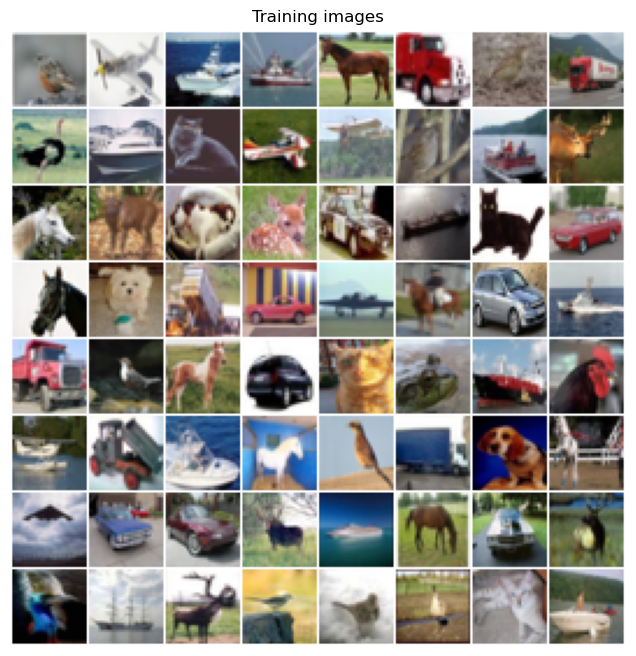

In [3]:
for images, labels in d_module.train_dataloader():
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(
    np.transpose(torchvision.utils.make_grid(
        images[:64],
        padding=1,
        pad_value=1.0,
        normalize=True),
        (1, 2, 0)
    )
)

plt.show()

## Data transform

In [4]:
from torchvision import transforms

train_transforms = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Resize((150, 150)),
        transforms.RandomCrop((128, 128)),
        transforms.RandomHorizontalFlip(p=0.1),
        transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

test_transform = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Resize((150, 150)),
        transforms.CenterCrop((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [6]:
L.pytorch.seed_everything(12)

d_module = Cifar10DataModule(batch_size=64, num_workers=8)
d_module.prepare_data()
d_module.setup()

Global seed set to 12


Files already downloaded and verified


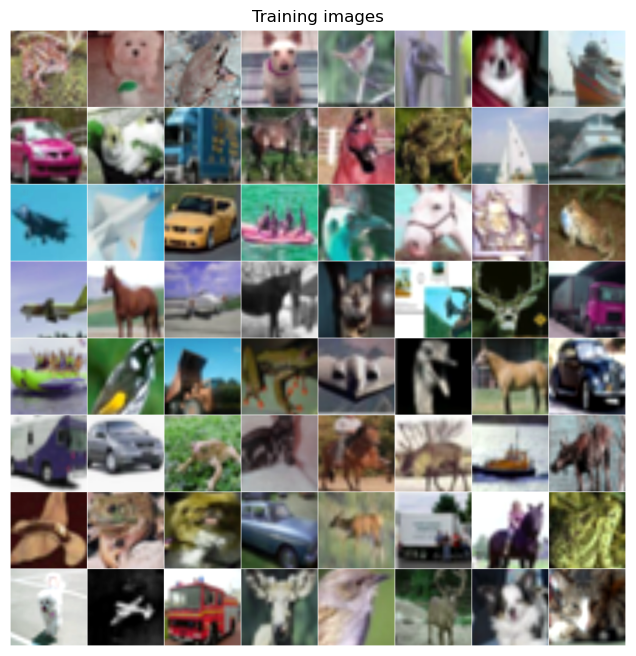

In [8]:
for images, labels in d_module.train_dataloader():
    break

transformed = [train_transforms(i) for i in images]
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(
    np.transpose(torchvision.utils.make_grid(
        transformed[:64],
        padding=1,
        pad_value=1.0,
        normalize=True),
        (1, 2, 0)
    )
)

plt.show()